# Stream Learning

 Most human activity has time as a key feature related to them. That relationship can be described according to the scale as a short-term or a long-term one. For example, a short-term relationship could be the recording of a signal for some time before analysing or processing it. Based on the features that could the extraction from a sliding window, machine learning approaches would usually build up a dataset for training and testing. That dataset would have several sections of the signal with the corresponding desired output for that piece of information. However, this is more complicated with long-term relationships that could not be easily recorded due to the scale. In this case, the evolution of the input does not show on the signal by itself making it much harder to capture those changes. Usually, classical machine learning approaches have struggled to keep the pace of the latter type. The common approach to tackle this kind of issue is to retrain a model from time to time and deploy an update, sometimes with a difference of minutes or even seconds. Alternatively, to deal with this kind of problem, a new knowledge area inside machine learning has arisen called online learning or stream learning.

Nowadays, due to possible confusion with some teaching practices, the term online learning has been replaced by stream learning. This term designated a specific scenario for an intelligent model, one where the model is constantly fed with an infinite stream of data is feed. Therefore, instead of a stable dataset which is fed once and again to adjust the model, the model is only to see that data once. This slight change comes with not a few issues that have to be tackled. Additionally, this change also comes with new opportunities that are going to be covered in the following sections as long as the problems.

However, before starting, it is required to formally define some background concepts.


## Data Stream

First and foremost, a key definition which is at the very core of stream learning is the term data stream. This term refers to a sequential collection of individual elements which, when we are talking about a machine learning approach, is a set of features measured simultaneously on an entity.

Each set of features measured at a certain time is also referred to as an observation or sample. At this point, It might be worth mentioning that those samples can have a stable structure, e.g., in every sample, all features are measured, or it can be more flexible with features that appear and disappear over time.

Therefore, generally speaking, we understand a data stream as a continuous set of samples over time.


### Reactive and proactive data streams

Those data streams can be later classified depending on the relationship with the user in reactive and proactive.

Reactive data streams are ones where the data comes to you. Typical examples can be the visits to a website, the interactions with a server, the events on a machine, etc. Therefore, any data stream that's out of your control and over which, you have no influence or control further than receiving and reading it. It just happens and you have to react to it.

Proactive data streams are ones where you have control over the data stream. For example, you might be reading the data from a file. You decide at which speed you want to read the data, in what order, etc.


## Online processing
This concept refers to processing a stream of data observation by observation. More specifically, if we focus on machine learning, it refers to training a model by teaching it one sample at a time.

This concept makes stream learning the complete opposite of the traditional approach, where the samples are packed in batches and, then, adjust the model after processing the errors of the bunch. Therefore, in online processing, the vectorization doesn't bring any speedup and numeric processing libraries such as NumPy and PyTorch bring too much overhead. So, the new approach does not revisit past data as the batched approach does, because it has a continuous data stream which, usually, can only be seen by the model once.

So, this concept establishes one of the key points of this approach and it is that the online learning model is a stateful, dynamic object. Consequently, we are in front of a new machine-learning paradigm with its pros and cons.

## Datasets in training

Although in production, 90% of the data stream is going to be reactive, when we have to tackle the training and evaluation of a model a dataset set is usually built. The reason behind this is that we usually do not have access to the real-time feed when we are developing the model, so it has to be simulated with some captured observations.

However, the capture of the dataset ends the similarities between traditional machine learning and online machine learning. Opposite to the first one, the online approach does not split the data into training and evaluation datasets but uses the whole dataset in both stages. So, when an observation arrives, it is used to evaluate the model and later the model is adjusted according to the output. This pace is continuously used in this kind of model and it is especially important for the time component to know which element comes first of which. The idea is to simulate the same scenario that the model is going to find in the real life to ensure correct behaviour over time.


### Concept Drift

The main reason why any machine learning approach, offline or online, can not be performing well with this kind of problem with a continuous feed of data is the concept drift. By this term, researchers named the situation when the data start to change over time a pattern not previously noticed appears or the balance among classes can vary.

The advantage of online models is that they can keep learning and, consequently, they can cope with drift. So, this kind of approach can adapt to concept drift seamlessly without having to retrain a new model. We would revisit this concept later with an example.



# Stream Machine Learning Libraries

Due to being a relatively new apporach, stream learning do not have a lot of implementations nowadays. In fact, the usual approach are ad-hoc implementations for each particular problem and entity. It has not been until recently that some libraries has appear in the stage with a more general approach to this point of view. The main actors nowadays can be resumed as:

- **Apache SAMOA**, a project to perform análisis and data mining on data Streams. It has a part focused on machine learning. Do not recive any update since 2020 and it is still in thenincubator of the Apache Fundation. It is roumored that the foundation is going to grop its development.

- **MOA**, the name comes from Massive Online Analysis. This proyect has been developed by the same authors of the WEKA proyect. So, it is deeply related with this one and it has been also written in Java. It includes a collection of machine learning algorithms (classification, regression, clustering, outlier detection, concept drift detection and recommender systems) and tools for evaluation. It is mainly limited to the interface provided or to implement extensions if you want to work with the remaining ecosystem.

- **Wowpal wallaby**, a Python library with a more general approach which cover questions like reinforment learning. It has a section focused on steam learning but more from the point of view reiforment learning. It has as downsize the requirement of a particular format in the data for the library, which significantl affects it s performance and usability

- **River**, another Python library focused on stream learning which has a more general appoach than Wowpal Wallaby. IN this case the number of models is similar to the ones present in scikit-learn with the tools to adapt them to the new approach. Additionaly it also has the possibility to develop reinformen learning approaches. As main advantage, it can work with the most common types of data such as Pandas Dataframes.

In this subject,  River is going to be our reference implemention on order to widen the number of problem that we can tackle with. Let's see a cople of examples for the most common scenarios.



## Binary classisification

Probably the most elemental approach to machine learning in general. In this case the models have a single output which is going to tell as if an example is from a certain class or the complementary one.

1. First step should be to install the library if we haven't done it, yet.

In [21]:
#It would required to use a version of Python >3.8
try:
    import river
except ImportError as err:
    !pip install river

    
# this library is only to improve the redability of some structures
try:
    from rich import print
except ImportError as err:
    !pip install rich
    from rich import print

2. Import a dataset to operate with. In this case the problem is going to be a detector of bank fraud with credit cards, one of the example dataset that river has implemented

In [23]:
from rich import print
from river import datasets

dataset = datasets.CreditCard()
print(f"The object contains the information of the dataset, such as, number of samples and features")
print(dataset)

The object contains the information of the dataset, such as, number of samples and features

Credit card frauds.

The datasets contains transactions made by credit cards in September 2013 by european
cardholders. This dataset presents transactions that occurred in two days, where we have 492
frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class
(frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation.
Unfortunately, due to confidentiality issues, we cannot provide the original features and 
more
background information about the data. Features V1, V2, ... V28 are the principal components
obtained with PCA, the only features which have not been transformed with PCA are 'Time' and
'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first
transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can 
be
used for example-dependant cost-senstive learning. Feature 'Class' is the response variable 
and
it takes value 1 in case of fraud and 0 otherwise.

      Name  CreditCard                                                     
      Task  Binary classification                                          
   Samples  284,807                                                        
  Features  30                                                             
    Sparse  False                                                          
      Path  /home/quique/river_data/CreditCard/creditcard.csv              
       URL  https://maxhalford.github.io/files/datasets/creditcardfraud.zip
      Size  143.84 MB                                                      
Downloaded  False

In [24]:
# Let's take a look on the first example
sample, target = next(iter(dataset))
print(sample)
print(target)

Uncompressing into /home/quique/river_data/CreditCard


{
    'Time': 0.0,
    'V1': -1.3598071336738,
    'V2': -0.0727811733098497,
    'V3': 2.53634673796914,
    'V4': 1.37815522427443,
    'V5': -0.338320769942518,
    'V6': 0.462387777762292,
    'V7': 0.239598554061257,
    'V8': 0.0986979012610507,
    'V9': 0.363786969611213,
    'V10': 0.0907941719789316,
    'V11': -0.551599533260813,
    'V12': -0.617800855762348,
    'V13': -0.991389847235408,
    'V14': -0.311169353699879,
    'V15': 1.46817697209427,
    'V16': -0.470400525259478,
    'V17': 0.207971241929242,
    'V18': 0.0257905801985591,
    'V19': 0.403992960255733,
    'V20': 0.251412098239705,
    'V21': -0.018306777944153,
    'V22': 0.277837575558899,
    'V23': -0.110473910188767,
    'V24': 0.0669280749146731,
    'V25': 0.128539358273528,
    'V26': -0.189114843888824,
    'V27': 0.133558376740387,
    'V28': -0.0210530534538215,
    'Amount': 149.62
}

0

3. Build a model that can be used to discriminate between the two classes. IN this particular case, a very simple linear_model is going to be created in order to exemplify a point.

In [25]:
from river import linear_model

model = linear_model.LogisticRegression()

Without properly training the model, the result of the probabilities for each class is exactly the same as it can be seen on the call to function `prdict_proba_one`. Let's see which response we have with the previous `sample`.

In [26]:
print(model.predict_proba_one(sample))

{False: 0.5, True: 0.5}

So, for each class we have a random classifier with no knowledge. This is the point were things differ from traditional machine learning. The same sample that has been used to test, it is going to be used to ajust the model, becase that sample is no longer be abvailable or seen again.

4. Train the model with the tested sample

In [27]:
model = model.learn_one(sample, target)

If we test again with the same pattern we would see variation of the probabilities

In [28]:
print(model.predict_proba_one(sample))

{False: 1.0, True: 0}

Simply to test the output and get an answer we can execute

In [29]:
print(model.predict_one(sample))

False

To integrate the steps in a single loop an see a complete process, the following piece of code shows how to use a loop and how integrate a rolling measure for this kind of systems. In this particular case the Area under the ROC curve, but we could have used any other.

In [30]:
from river import metrics

model = linear_model.LogisticRegression()

metric = metrics.ROCAUC()

for sample, target in dataset:
    prediction = model.predict_proba_one(sample)
    model.learn_one(sample, target)
    metric.update(target, prediction)

print(metric)

ROCAUC: 52.86%

It should be highlighhted here, that nbot only the models can be used but, in a similar way to `scikit-learn`, the library also has pipelines in their core to link different process. For example, here is an pipeline with an standarization and a LogisticRegression. In this case, it could be worth mentioning, we haven't use the loop because there is a function that makes the loop and evaluation for us, i.e., `evaluate. progressive_val_score`.

In [31]:
from river import evaluate
from river import compose
from river import preprocessing

model = compose.Pipeline(
    preprocessing.StandardScaler(),
    linear_model.LogisticRegression()
)

model

metric = metrics.ROCAUC()
evaluate.progressive_val_score(dataset, model, metric)

ROCAUC: 89.11%

## Multiclass Classification

The next step in complexity should be the multiclass classification, where each instance, instead of a single two-class problem, can belong to any of a set of labels. In this scenario, the steps are similar to the binary classification but adapting the techniques or the loss functions to take into account the multioutput. For example, using the same library as before, we use a dataset with different images to identify the type of elements which could belong to any of  7 possible classes.

In [1]:
from rich import print
from river import datasets

dataset = datasets.ImageSegments()
print(dataset)

Image segments classification.

This dataset contains features that describe image segments into 7 classes: brickface, sky,
foliage, cement, window, path, and grass.

    Name  ImageSegments                                                                  
    Task  Multi-class classification                                                     
 Samples  2,310                                                                          
Features  18                                                                             
  Sparse  False                                                                          
    Path  /home/quique/.local/lib/python3.10/site-packages/river/datasets/segment.csv.zip

As in binary classification, the dataset has the samples associated with a particular target in a tuple-like structure. However, it is here where we can see the first difference with the binary classifier. In this case, we are going to define a new classification method called the Howddfing tree. When the probabilities are checked  for a certain sample, it is going to be empty. The reason is that the model has not already seen any sample. So, it has no information about the "possible" classes. If this were a binary classifier, it would output a probability of 50% for True and False because the classes would be implicit. But in this case, we're doing multiclass classification.o

Going along with this behaviour, the predict_one method initially returns None because the model hasn't seen any labelled data yet.

In [8]:
from river import tree

data_stream = iter(dataset)
sample, target = next(data_stream)

model = tree.HoeffdingTreeClassifier()
print(model.predict_proba_one(sample))
print(model.predict_one(sample))

{}

None

However, when the model learns examples, it adds those classes to the possibilities of the model. For example, learning the first sample will give 100% of probabilities that the sample is assigned t that class.

In [9]:
model.learn_one(sample, target)
print(model.predict_proba_one(sample))
print(model.predict_one(sample))

{'path': 1.0}

path

If a second sample is used to train, we can see how the probabilies change.

In [10]:
sample, target = next(data_stream) # Next sample on the list

model.learn_one(sample, target)
print(model.predict_proba_one(sample))
print(model.predict_one(sample))

{'foliage': 0.5, 'path': 0.5}

foliage

This is one of the key points of online classifiers, the models can deal with new classes which appear in the data stream.

Typically, the data is used once to make a prediction. When the prediction is made, the ground-truth will emerge later and it can be used first to train the model and also to evaluate. This schema is usually called **progressive validation** .

In [13]:
from river import metrics

model = tree.HoeffdingTreeClassifier()

metric = metrics.ClassificationReport()

for sample, target in dataset:
    prediction = model.predict_one(sample)
    model.learn_one(sample, target)
    if prediction is not None:
        metric.update(target, prediction)

print(metric)

Precision   Recall   F1       Support  
                                                   
brickface      77.13%   84.85%   80.81%       330  
   cement      78.92%   83.94%   81.35%       330  
  foliage      65.69%   20.30%   31.02%       330  
    grass     100.00%   96.97%   98.46%       330  
     path      90.63%   91.19%   90.91%       329  
      sky      99.08%   98.18%   98.63%       330  
   window      43.50%   67.88%   53.02%       330  
                                                   
    Macro      79.28%   77.62%   76.31%            
    Micro      77.61%   77.61%   77.61%            
 Weighted      79.27%   77.61%   76.31%            

                  77.61% accuracy

In this case, `ClassificationReport` retrieves the precision, recall and F1 for each class the model has seen. Additionally, the Support column indicates the number of instances identified in the stream. Finally, we can see the three different aggregated measures and the general accuracy of the system. 

This exemplifies a typical pipeline in stream learning. It is so frequent that  River has a class to encapsulate the whole process in a single instance, as in the binary classification.

In [15]:
from river import evaluate

model = tree.HoeffdingTreeClassifier()
metric = metrics.ClassificationReport()

print(evaluate.progressive_val_score(dataset, model, metric))

Precision   Recall   F1       Support  
                                                   
brickface      77.13%   84.85%   80.81%       330  
   cement      78.92%   83.94%   81.35%       330  
  foliage      65.69%   20.30%   31.02%       330  
    grass     100.00%   96.97%   98.46%       330  
     path      90.63%   91.19%   90.91%       329  
      sky      99.08%   98.18%   98.63%       330  
   window      43.50%   67.88%   53.02%       330  
                                                   
    Macro      79.28%   77.62%   76.31%            
    Micro      77.61%   77.61%   77.61%            
 Weighted      79.27%   77.61%   76.31%            

                  77.61% accuracy

## Regression

Lastly, about the typical problems, we have the regression ones. In this case, the model has to predict a numeric output for a given sample. A  regression sample is made up of a bunch of features and a target which is usually codified as a continuous number, although it may also be discrete. Let's see an example with the Trump approval rating.

In [16]:
from river import datasets

dataset = datasets.TrumpApproval()
print(dataset)

Donald Trump approval ratings.

This dataset was obtained by reshaping the data used by FiveThirtyEight for analyzing Donald
Trump's approval ratings. It contains 5 features, which are approval ratings collected by
5 polling agencies. The target is the approval rating from FiveThirtyEight's model. The goal 
of
this task is to see if we can reproduce FiveThirtyEight's model.

    Name  TrumpApproval                                                                      
    Task  Regression                                                                         
 Samples  1,001                                                                              
Features  6                                                                                  
  Sparse  False                                                                              
    Path  
/home/quique/.local/lib/python3.10/site-packages/river/datasets/trump_approval.csv.gz

So, we have a dataset with 6 features and we have to give a prediction in $[0,1]$. To do so, we are going to use a regression model, in this case, a KNN adapt to perform regression which is already implemented in the library.

In [18]:
from river import neighbors

data_stream = iter(dataset)
sample, target = next(data_stream)

model = neighbors.KNNRegressor()
print(model.predict_one(sample))

0.0

As it can be seen, the model has not been trained already and, therefore, the default output is $0.0$. Now, we are going to train the model and repeat the prediction

In [19]:
model = model.learn_one(sample, target)
print(model.predict_one(sample))

43.75505

Going along with the **progressive validation** as in the previous cases, we can found the same loop of prediction, train and evaluation that we have previously seen.

In [21]:
from river import metrics

model = neighbors.KNNRegressor()

metric = metrics.MAE()

for sample, target in dataset:
    prediction = model.predict_one(sample)
    model.learn_one(sample, target)
    metric.update(target, prediction)

print(metric)

MAE: 0.31039

Or, in the compact notation

In [22]:
from river import evaluate

model = neighbors.KNNRegressor()
metric = metrics.MAE()

evaluate.progressive_val_score(dataset, model, metric)

MAE: 0.31039

# Concept Drift

As you have seen so far, stream learning needs models that can adapt over time and be trained in the progressive validation schema. The main reason for this requirement is the fact that it is assumed that data can change over time. Classical machine learning models assume that data has a probability distribution, which is usually fixed, i.e., stationary. However, stream learning has to deal with data whose distribution can change, which drives a new phenomenon called **Concept drift**.

Concept drifts can be classified into two main groups, virtual and real. In the first one, virtual concept drift, the distribution of the features changes whereas the relationship between features and target remains stable. Consequently, we would see changes in $P(X)$ but the joint distribution $P(X,y)$ remain, being $X$ the feature set and $y$ the desired output. On the other hand, in real concept drift, this joint probability is one that varies. It is worth mentioning that this change can be abrupt or gradual.

There are many situations where a concept drift can happen, such as the stock market, the electric demand, or the movie preference of a user, ... Take for a moment the example of a supermarket that has to restock its supplies, could you imagine the disaster that would have been to use nowadays a recommendation model trained with the data from the beginning of 2020 pandemia where people only want face mask, hydroalcoholic gel and toilet paper. So, over time the preferences of users change and the systems should adapt to this point.

The most common approach to deal with the concept drift is the use of drift-aware methods to trigger mitigation mechanisms. The main objective of the latter is to rise an alarm when a change in performance is detected. Some authors establish some desirable properties for the detectors, such as maximising the number of True Positives (TP) while it keeps the (FP) to a minimum, i.e., with high precision. Additionally, the other feature of these alarm methods is to be efficient and, theoretically, able to work with an infinite data stream.

Let's see an example composed by5 distributions of 5,000 samples with the following properties:
* $dist_a:\mu=0.9, \sigma=0.01$
* $dist_b:\mu=0.8, \sigma=0.05$
* $dist_c:\mu=0.4, \sigma=0.02$
* $dist_d:\mu=0.6, \sigma=0.1$
* $dist_e:\mu=0.6, \sigma=0.01$

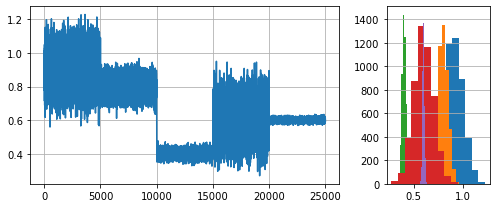

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec

# Generate data for 5 distributions
random_state = np.random.RandomState(seed=41)
dist_a = random_state.normal(0.9, 0.1, 5000)
dist_b = random_state.normal(0.8, 0.05, 5000)
dist_c = random_state.normal(0.4, 0.02, 5000)
dist_d = random_state.normal(0.6, 0.1, 5000)
dist_e = random_state.normal(0.6, 0.01, 5000)

# Create out synthetic data stream
stream = np.concatenate((dist_a, dist_b, dist_c, dist_d, dist_e))

# Auxiliary function to analyse the data
def plot_data(stream, dists, drifts=None):
    fig = plt.figure(figsize=(7,3), tight_layout=True)
    gs = gridspec.GridSpec(1, 2, width_ratios=[3, 1])
    ax1, ax2 = plt.subplot(gs[0]), plt.subplot(gs[1])
    ax1.grid()
    ax1.plot(stream, label='Stream')
    ax2.grid(axis='y')
    for id, dist in enumerate(dists):
        ax2.hist(dist, label=f'dist_{id}')
    if drifts is not None:
        for drift_detected in drifts:
            ax1.axvline(drift_detected, color='red')
    plt.show()

plot_data(stream, [dist_a, dist_b, dist_c, dist_d, dist_e])

Now, let's see an example of one of these detectors, which is called Adaptative WINdowing (ADWIN). This method has as objective to determine when a change in the properties of the data stream happens. The idea is to tackle the deviation as soon as possible.


Change detected at index 5471
Change detected at index 10047
Change detected at index 15071


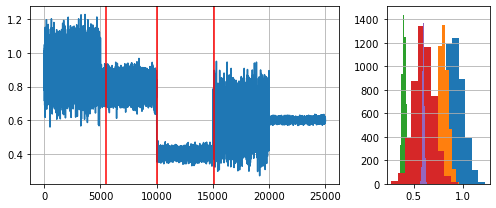

In [13]:
from river import drift

drift_detector = drift.ADWIN()
drifts = []

for i, val in enumerate(stream):
    drift_detector.update(val)   # Data is processed one sample at a time
    if drift_detector.drift_detected:
        # The drift detector indicates after each sample if there is a drift in the data
        print(f'Change detected at index {i}')
        drifts.append(i)

plot_data(stream, [dist_a, dist_b, dist_c, dist_d, dist_e], drifts)

As we can see, this method has  identified 3 out of 4 drifts. Another point to highlight, if the change is gradual, such as the first drift, it would require more steps to identity that change. In this particular case, it takes a solid amount to detect instead of 5000 o close, it will require nearly 500 samples to b aware of the change

But, why the method has not raised an alarm in the last change? Because it is not a drift, you should remember that a drift is a change in the relationship between data and target and, in this case, there is no such because the average is the same. Here arise another of the key point of these detectors, they can only be used for univariate data. That is the reason why they are used to monitor a model's performance and not the data itself.